In [3]:
import matplotlib.pyplot as plt # 21BAI1210
import cv2
import numpy as np
from matplotlib import pyplot as plt

Load the image and apply thresholding

In [4]:
img = cv2.imread('./lenna.png', cv2.IMREAD_GRAYSCALE)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

Region growing

In [5]:
def region_growing(image, seed_point, threshold):
    rows, cols = image.shape
    visited = np.zeros_like(image, dtype=bool) # Use bool instead of np.bool
    segmented = np.zeros_like(image)
    queue = [seed_point]
    while queue:
        x, y = queue.pop(0)
        if not visited[x, y]:
            visited[x, y] = True
            segmented[x, y] = image[x, y]
            
            # Check neighbors
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx = x + dx
                    ny = y + dy
                    if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny] and abs(int(image[nx, ny]) - int(image[x, y])) <= threshold:
                        queue.append((nx, ny))
    return segmented

Define seed point and threshold and apply region growing

In [6]:
seed_point = (50, 50)
threshold = 10

segmented_image = region_growing(img, seed_point, threshold)

Display the results

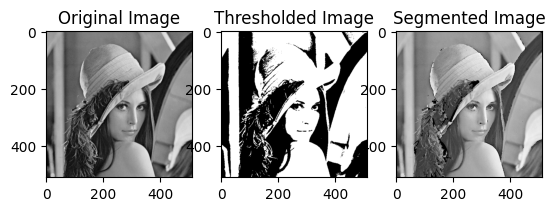

In [7]:
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.subplot(1, 3, 3)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.show()